## Data science job salary prediction

In [268]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [269]:
# import dataset
df = pd.read_csv('data_cleaned_2021.csv')
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [270]:
# replace unknowns to numpy NaN's
df.replace(-1, np.nan, inplace=True)
df.replace('-1', np.nan, inplace=True)
df.replace("na", np.nan, inplace=True)
df.replace("unknown", np.nan, inplace=True)
df.replace("Unknown / Non-Applicable", np.nan, inplace=True)

In [271]:
# drop useless columns and na's
df = df.drop(['index', 'Degree', 'Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'Size', 'Founded', 'Headquarters', 'job_title_sim', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary','company_txt', 'Job Location', 'keras', 'sas', 'pytorch', 'hadoop', 'bi', 'flink', 'mongo', 'google_an', 'seniority_by_title'], axis=1)
df = df.dropna()
df.head()

,Rating,Avg Salary(K),Age,Python,spark,aws,excel,sql,scikit,tensor,tableau
0,3.8,72.0,48.0,1,0,0,1,0,0,0,1
1,3.4,87.5,37.0,1,0,0,0,0,0,0,0
2,4.8,85.0,11.0,1,1,0,1,1,0,0,0
3,3.8,76.5,56.0,1,0,0,0,0,0,0,0
4,2.9,114.5,23.0,1,0,0,1,1,0,0,0


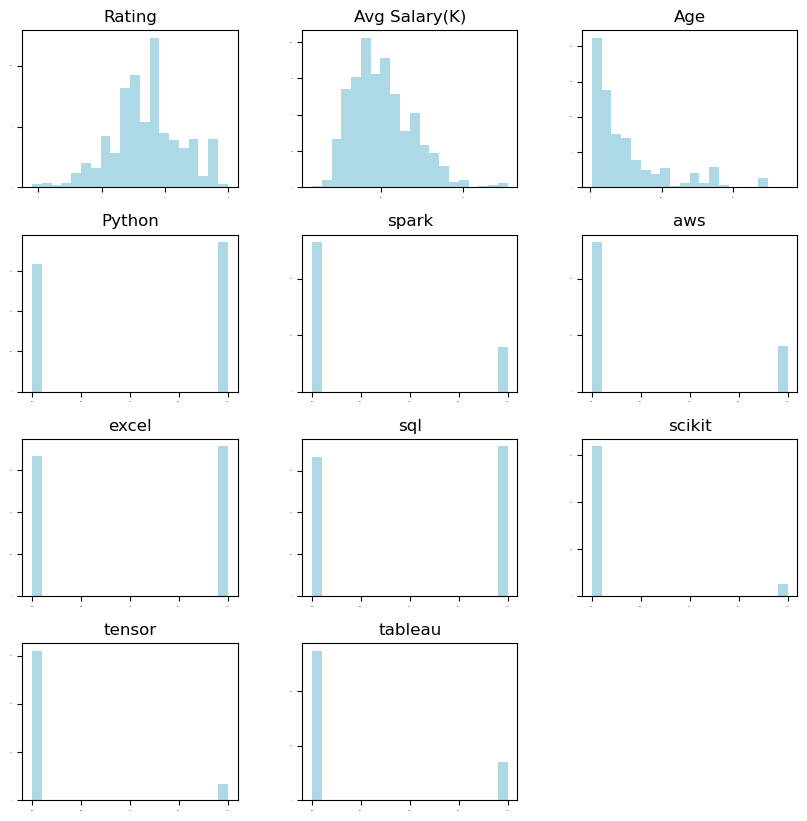

In [272]:
# exploring data distribution
df.hist(bins=20,figsize=(10,10), color='lightblue', xlabelsize=0, ylabelsize=0, grid=False) 
plt.show()

In [273]:
# shift avg salary column to end
avgsal = df.pop('Avg Salary(K)')
df.insert(10, 'Avg Salary(K)', avgsal)
df.head()

,Rating,Age,Python,spark,aws,excel,sql,scikit,tensor,tableau,Avg Salary(K)
0,3.8,48.0,1,0,0,1,0,0,0,1,72.0
1,3.4,37.0,1,0,0,0,0,0,0,0,87.5
2,4.8,11.0,1,1,0,1,1,0,0,0,85.0
3,3.8,56.0,1,0,0,0,0,0,0,0,76.5
4,2.9,23.0,1,0,0,1,1,0,0,0,114.5


In [274]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 1)

In [276]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [277]:
y_pred = lr.predict(X_test)

In [278]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error :',mean_squared_error(y_test, y_pred)/100)

Mean Squared Error : 12.111808097823598


In [279]:
# final fit
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [280]:
# pickle the model
import pickle
pickle.dump(lr, open('model.pkl', 'wb'))

In [281]:
# manual predict
lr.predict(np.array([[3.8,48,1,0,0,1,0,0,0,1]]))

array([101.9317735])